In [134]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wav length: 30.013333333333332, Mel_S shape:(40, 3009)


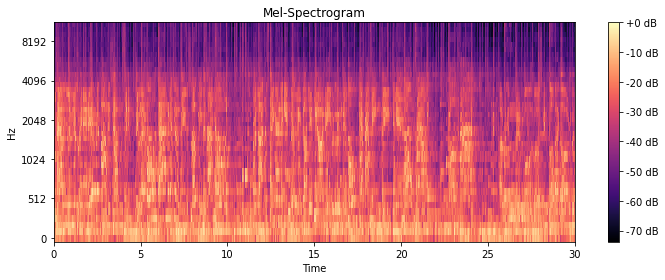

In [135]:
frame_length = 0.025
frame_stride = 0.010


y, sr = librosa.load('./genres/country/country.00027.wav', sr=22050)

# wav_length = len(y)/sr
input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))

S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()



In [136]:
# 해당 음악의 bpm(beat per minute) 출력
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo,beats

(92.28515625,
 array([   9,   38,   66,   93,  121,  150,  177,  205,  233,  261,  290,
         317,  345,  373,  401,  428,  455,  483,  510,  538,  566,  593,
         621,  649,  676,  704,  732,  760,  788,  815,  843,  871,  899,
         927,  954,  981, 1009, 1036, 1064, 1090, 1118, 1147, 1175, 1202,
        1230, 1258]))

In [137]:
display(librosa.onset.onset_detect(y=y, sr=sr, units='time'))

array([ 0.06965986,  0.20897959,  0.53405896,  0.85913832,  1.20743764,
        1.41641723,  1.53251701,  1.71827664,  1.85759637,  2.02013605,
        2.15945578,  2.48453515,  2.69351474,  2.7631746 ,  3.0185941 ,
        3.13469388,  3.4829932 ,  3.66875283,  3.80807256,  3.94739229,
        4.10993197,  4.41179138,  4.59755102,  4.73687075,  4.87619048,
        5.06195011,  5.27092971,  5.38702948,  5.7353288 ,  6.03718821,
        6.40870748,  6.57124717,  6.71056689,  7.05886621,  7.2214059 ,
        7.33750567,  7.68580499,  7.9876644 ,  8.33596372,  8.66104308,
        8.89324263,  9.0093424 ,  9.14866213,  9.31120181,  9.61306122,
        9.93814059, 10.24      , 10.40253968, 10.56507937, 10.72761905,
       10.89015873, 11.02947846, 11.19201814, 11.35455782, 11.49387755,
       11.65641723, 11.81895692, 12.14403628, 12.4923356 , 12.79419501,
       12.97995465, 13.14249433, 13.30503401, 13.4675737 , 13.76943311,
       14.07129252, 14.39637188, 14.72145125, 15.04653061, 15.23

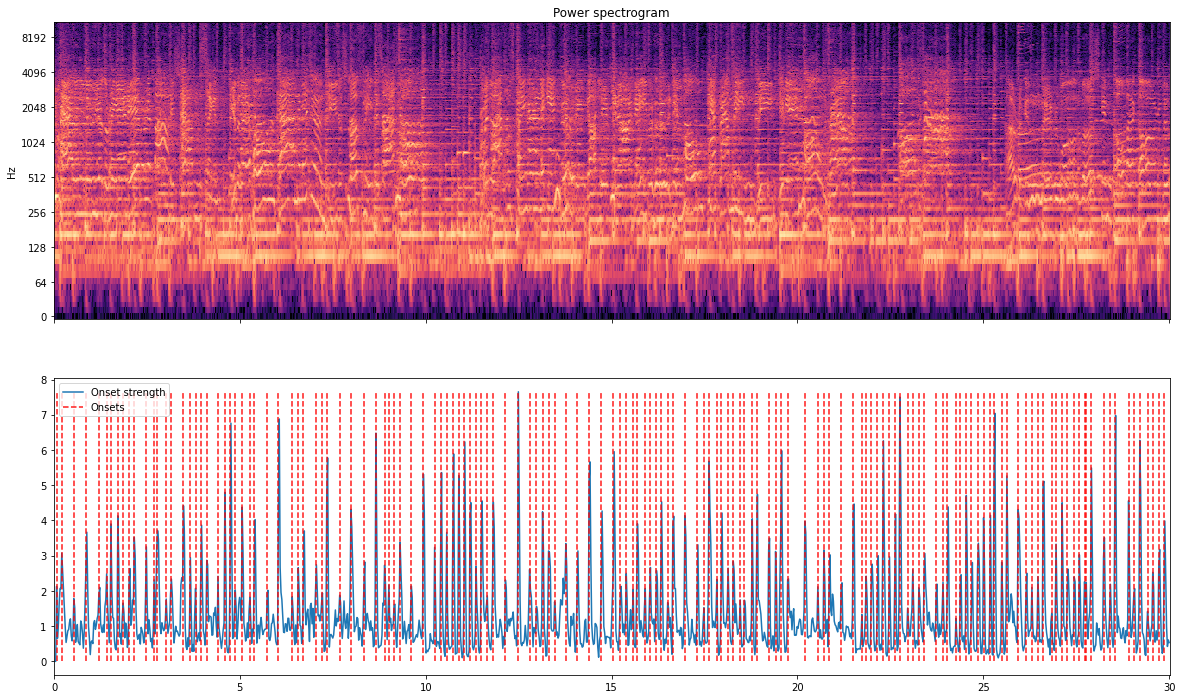

In [138]:
import matplotlib.pyplot as plt
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(figsize = (20,12),nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

In [139]:
# 음원의 음계를 탐색
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_stft

chroma = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

for i in range(len(chroma_stft)):
    print(chroma[i], '=',np.mean(chroma_stft[i]))

C = 0.26727608
C# = 0.3642912
D = 0.3319756
D# = 0.40060532
E = 0.5926683
F = 0.39323115
F# = 0.32996452
G = 0.2891343
G# = 0.4509738
A = 0.56268466
A# = 0.3610772
B = 0.35789546


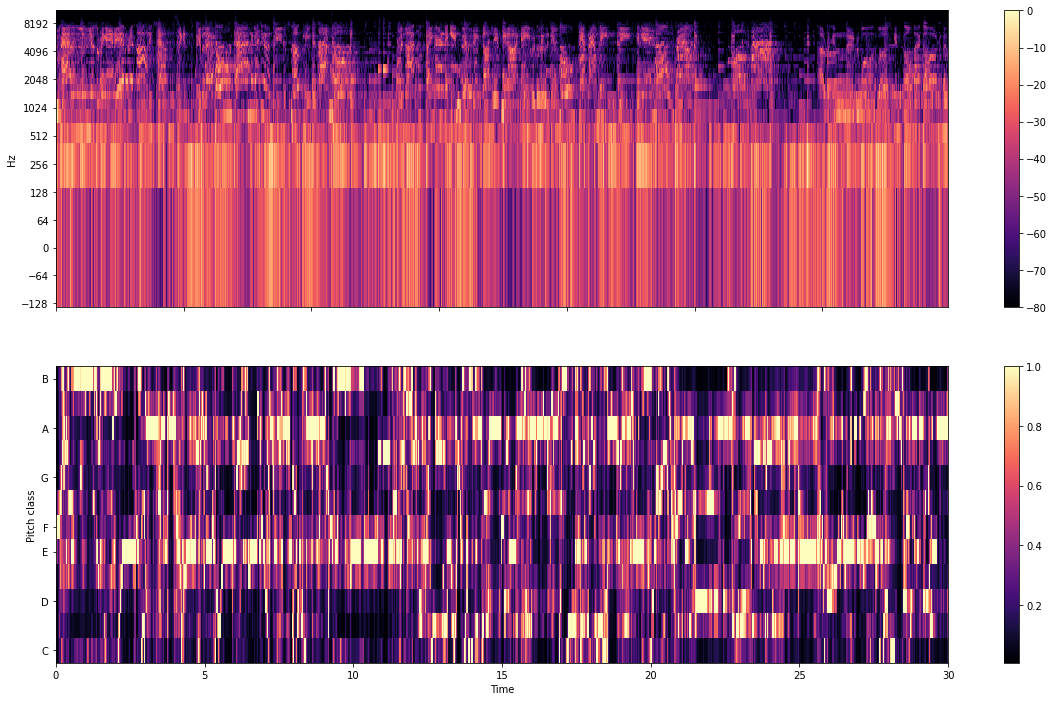

In [140]:
fig, ax = plt.subplots(figsize = (20,12),nrows=2)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])